In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Loan%20Eligibility%20Prediction.csv')
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


# Подготовка датасета

In [42]:
# обращаем столбцы типа object в бинарные
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data = df.copy()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = encoder.fit_transform(data[col])
data.head()
data

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,2,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,2,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,1,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,1,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,1,1,2,0,0,2947,1603.0,10,360,1,2,0
610,525,1,0,0,0,0,4680,2087.0,15,360,1,1,0
611,551,1,1,2,0,1,6633,0.0,25,360,0,0,0
612,552,1,1,1,1,0,2492,2375.0,30,360,1,0,1


In [43]:
#чистим выборку от выбросов по целевой переменной
clean_data = data[(data['Loan_Status']>=data['Loan_Status'].quantile(0.05))&(data['Loan_Status']<=data['Loan_Status'].quantile(0.95))]


#разделение датасета на обучающую и тестовую выборки для двух параметров, нормализация выборки, обучение модели опорных векторов

In [44]:
from sklearn.preprocessing import MinMaxScaler
cld=clean_data
features = ['Applicant_Income', 'Loan_Amount']

target = ['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(cld[features], cld[target], test_size=0.25, random_state = 28)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)


clf = SVC(kernel = 'linear').fit(x_train_scaled, y_train.values.ravel())



#график с разделяющей линией

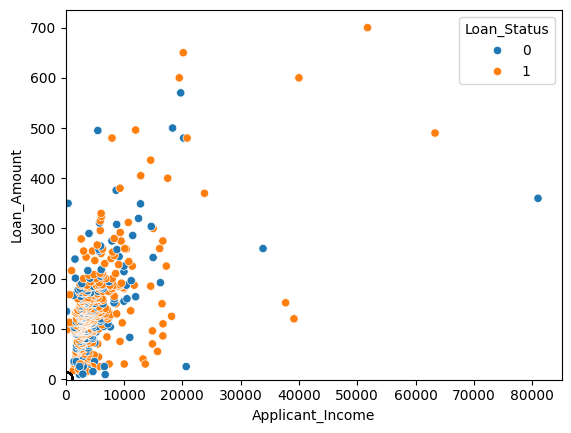

In [45]:
def draw_svm(X_train, clf):
  fig, ax = plt.subplots()
  sns.scatterplot(x = cld['Applicant_Income'], y = cld['Loan_Amount'], hue = cld['Loan_Status'])
  ax = plt.gca()

  DecisionBoundaryDisplay.from_estimator(
      clf,
      X_train,
      plot_method="contour",
      colors="k",
      levels=[-1, 0, 1],
      alpha=0.5,
      linestyles=["--", "-", "--"],
      ax=ax,
  )

  ax.scatter(
      clf.support_vectors_[:, 0],
      clf.support_vectors_[:, 1],
      s=100,
      linewidth=1,
      facecolors="none",
      edgecolors="k",
  )

draw_svm(x_train_scaled, clf)

Вывод: масштаб вектора и графика для значений не совпадает.

#Обучим модель на 20 нормализованных значениях

In [61]:
#обучаем модель на 20 точках нормализованных переменных для отрисовки графика
sample_data = clean_data.sample(n=20, random_state=28)

X_sample = sample_data[['Applicant_Income', 'Loan_Amount']].values
y_sample = sample_data['Loan_Status'].values

scaler = MinMaxScaler()

x_sample_train_scaled = scaler.fit_transform(X_sample)


clf_sample = SVC(kernel='linear').fit(x_sample_train_scaled, y_sample)

#создаем датасет из нормализованных данных для графика
scaled_plot_data = pd.DataFrame(x_sample_train_scaled, columns=['Applicant_Income', 'Loan_Amount'])
scaled_plot_data['Loan_Status'] = y_sample

построим график для 20 нормализованных значений

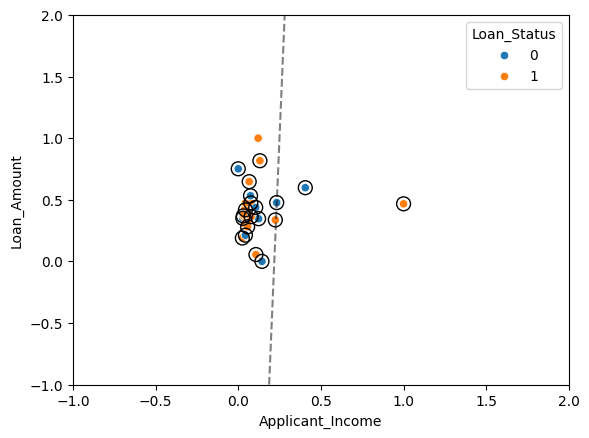

In [57]:
def draw_svm(data, X_train, clf):
  fig, ax = plt.subplots()
  sns.scatterplot(x=scaled_plot_data['Applicant_Income'], y=scaled_plot_data['Loan_Amount'], hue=scaled_plot_data['Loan_Status'])
  ax = plt.gca()

  DecisionBoundaryDisplay.from_estimator(
      clf,
      X_train,
      plot_method="contour",
      colors="k",
      levels=[-1, 0, 1],
      alpha=0.5,
      linestyles=["--", "-", "--"],
      ax=ax,
  )

  ax.scatter(
      clf.support_vectors_[:, 0],
      clf.support_vectors_[:, 1],
      s=100,
      linewidth=1,
      facecolors="none",
      edgecolors="k",
  )

  plt.show()


draw_svm(scaled_plot_data, x_sample_train_scaled, clf_sample)

 граница линейного ядра не может разделить признаки Applicant_Income и Loan_Amount, также признаки скорее всего сильно скоррелированы между собой, т.к. накладываются друг на друга

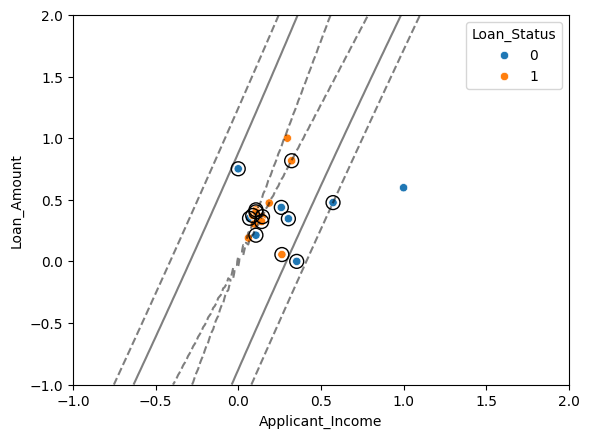

In [62]:
clf_sample = SVC(kernel = 'poly', degree = 2).fit(x_sample_train_scaled, y_sample)
draw_svm(scaled_plot_data, x_sample_train_scaled, clf_sample)

граница полиномиального ядра проходит по точкам loan_status = 1, так что большинство точек с loan_status = 0 осталось в области справа, в которой только один "партизан" с loan_status = 1

#подбор параметра с помощью GridSearch

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C': np.linspace(start = 0.1, stop = 50, num = 10)}

svc = SVC()
clf = GridSearchCV(svc, parameters, scoring = 'f1')
clf.fit(x_sample_train_scaled, y_sample)

pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_score', ascending = True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.001585,0.000234,0.003595,0.000141,5.644444,rbf,"{'C': 5.644444444444444, 'kernel': 'rbf'}",1.000000,0.666667,0.666667,0.666667,0.857143,0.771429,0.136027,1
5,0.001521,0.000285,0.003837,0.000577,11.188889,rbf,"{'C': 11.188888888888888, 'kernel': 'rbf'}",1.000000,0.666667,0.666667,0.666667,0.857143,0.771429,0.136027,1
1,0.001705,0.000279,0.003939,0.000164,0.100000,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.666667,0.666667,0.666667,0.857143,0.857143,0.742857,0.093314,3
0,0.001835,0.000231,0.004247,0.000308,0.100000,linear,"{'C': 0.1, 'kernel': 'linear'}",0.666667,0.666667,0.666667,0.857143,0.857143,0.742857,0.093314,3
7,0.001374,0.000122,0.003313,0.000254,16.733333,rbf,"{'C': 16.733333333333334, 'kernel': 'rbf'}",0.666667,0.666667,0.800000,0.666667,0.857143,0.731429,0.081349,5
14,0.001445,0.000147,0.003294,0.000251,38.911111,linear,"{'C': 38.91111111111111, 'kernel': 'linear'}",0.800000,0.666667,0.666667,0.666667,0.857143,0.731429,0.081349,5
11,0.001392,0.000064,0.003403,0.000127,27.822222,rbf,"{'C': 27.822222222222223, 'kernel': 'rbf'}",0.666667,0.666667,0.800000,0.666667,0.857143,0.731429,0.081349,5
9,0.001487,0.000071,0.003608,0.000170,22.277778,rbf,"{'C': 22.27777777777778, 'kernel': 'rbf'}",0.666667,0.666667,0.800000,0.666667,0.857143,0.731429,0.081349,5
15,0.001341,0.000052,0.003125,0.000030,38.911111,rbf,"{'C': 38.91111111111111, 'kernel': 'rbf'}",0.666667,0.666667,0.800000,0.666667,0.857143,0.731429,0.081349,5
13,0.001409,0.000184,0.004032,0.000957,33.366667,rbf,"{'C': 33.36666666666667, 'kernel': 'rbf'}",0.666667,0.666667,0.800000,0.666667,0.857143,0.731429,0.081349,5


график с лучшим подобранным вариантом разделения признаков

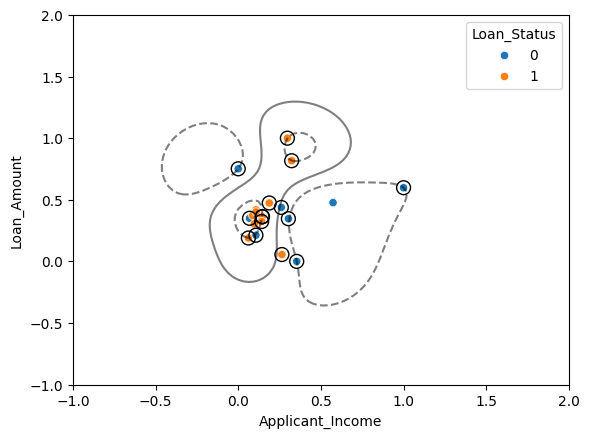

In [64]:
fig, ax = plt.subplots()
sns.scatterplot(data = scaled_plot_data, x = 'Applicant_Income', y = 'Loan_Amount', hue = 'Loan_Status')

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    x_train_scaled,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    clf.best_estimator_.support_vectors_[:, 0],
    clf.best_estimator_.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

на графике область с классом Loan_Status = 1 не отделена четко от точек другого класса, наслоения точек 2 классов друг на друга остаются из-за сильной взаимной корреляции

# предсказания для тестовой выборки

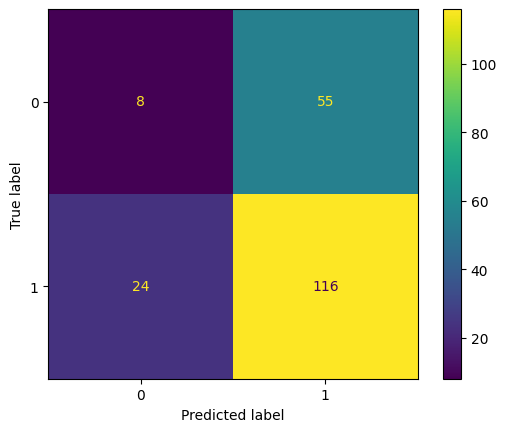

Accuracy: 0.6108374384236454
Precision: 0.6783625730994152
Recall: 0.8285714285714286
F1-score: 0.7459807073954984


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

x = clean_data[['Applicant_Income', 'Loan_Amount']]
y = clean_data['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 28, stratify = y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)



clf = SVC(kernel = 'rbf', class_weight='balanced').fit(x_train_scaled, y_train)
x_test_scaled = scaler.transform(x_test)
y_pred = clf.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Модель чаще предсказывает, что кредит будет выдан (Loan_Status = 1), при этом доля правильных ответов и точность невысокие даже с принудительной балансировкой классов. Сильно коррелированные признаки не могут обучить модель корректно.